In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_csv('/home/pawcio/Desktop/Projekty/jdsz4-dept/projekt_ml/dataset/insurance_hot_version.csv')
df.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [3]:
X = df.drop(columns=['sex_female', 'smoker_no', 'charges'])
y = df['charges']

In [4]:
def xgboost_model(x, y):
    
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    # normalization
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    norm_X_train = scaler.transform(X_train)
    norm_X_test = scaler.transform(X_test)
    # create model
    model_xgb = xgb.XGBRegressor(booster='gbtree', max_depth=3,n_estimators=80, objective='reg:linear')
    model_xgb.fit(norm_X_train, y_train)
    # y_pred calculation
    y_pred = model_xgb.predict(norm_X_test)
    # display chart
    xgb.plot_importance(model_xgb)
    rcParams['figure.figsize'] = 80,50
    # display tree
    xgb.plot_tree(model_xgb)
    
    # params
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    print("RMSE = ", rmse)
    print('R^2 = ', r2)
    return model_xgb

/home/pawcio/miniconda3/envs/nowe_srodowisko_condy/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:31:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE =  20341285.41085112
R^2 =  0.8611939460753555


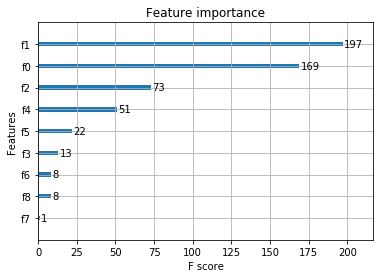

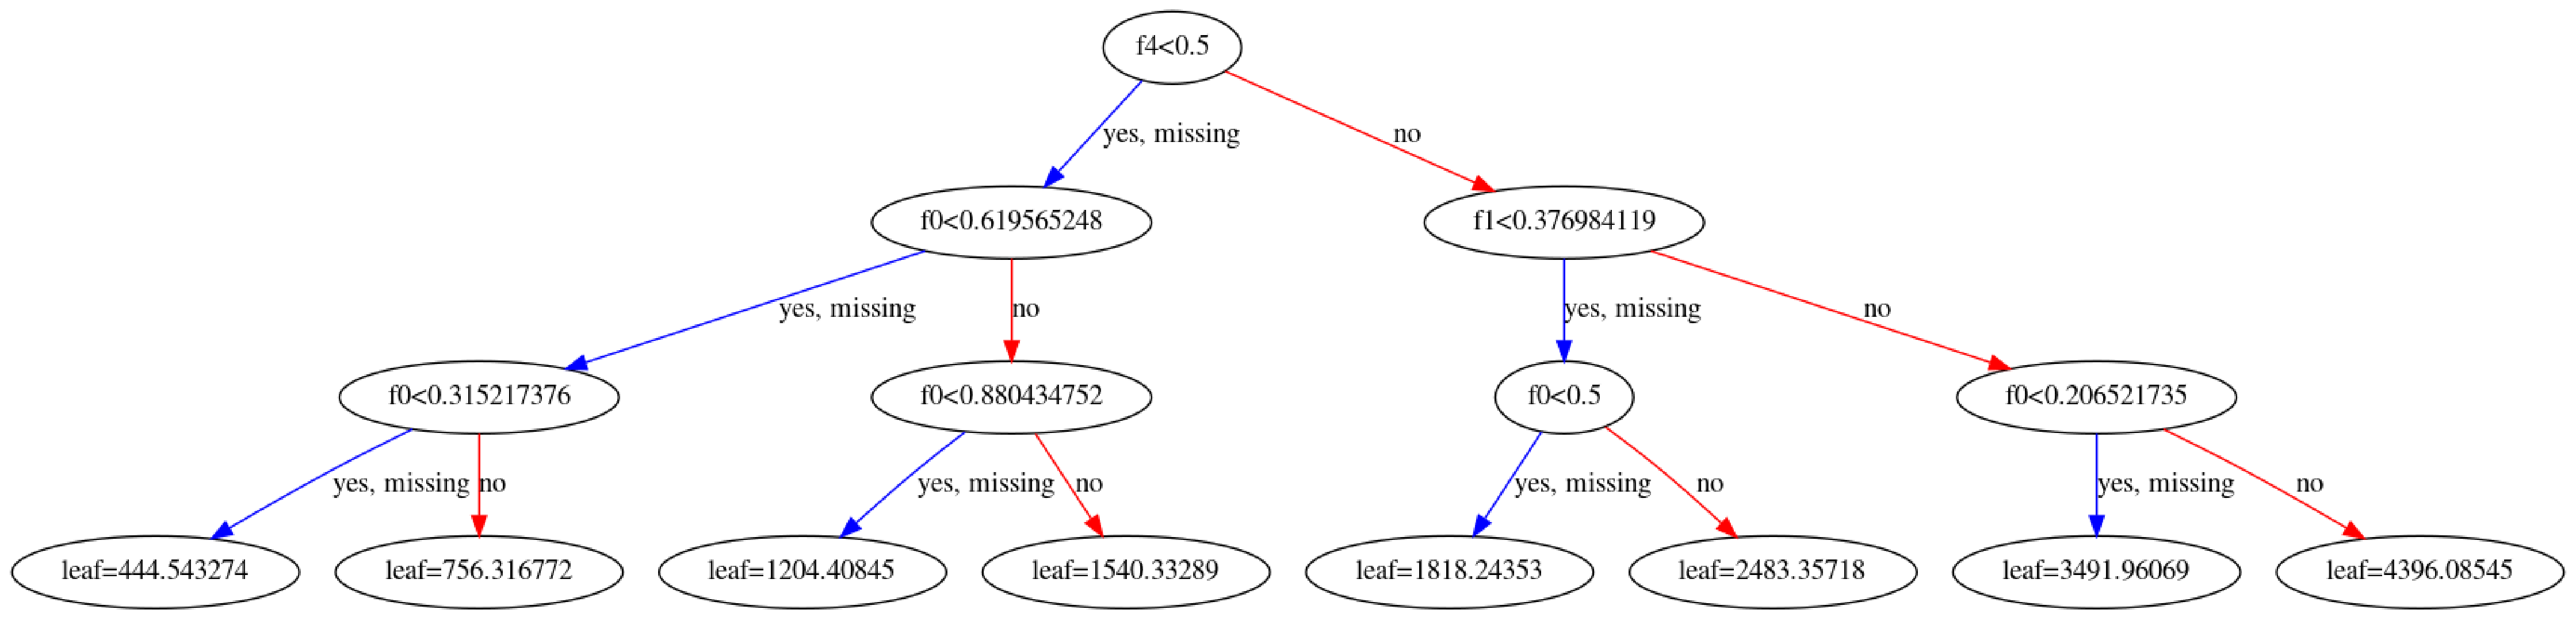

In [6]:
xgb_model = xgboost_model(X,y)

In [7]:
from joblib import dump, load
dump(xgb_model, 'best_model.joblib')

['best_model.joblib']